#### Bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importação dos dados

In [93]:
dadosTreino = pd.read_csv('titanic_train.csv')
dadosTeste = pd.read_csv('titanic_test.csv')

### Análise e Visualização dos Dados

In [8]:
dadosTreino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dadosTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
dadosTreino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


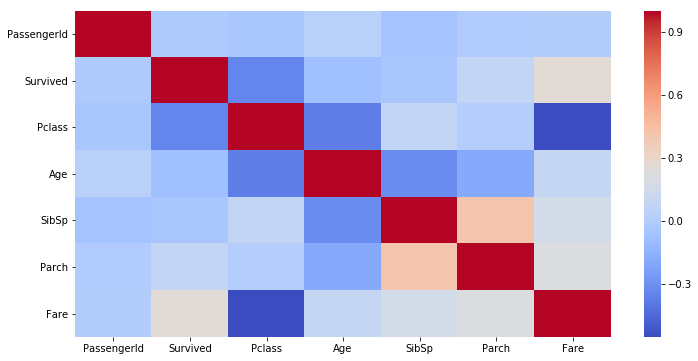

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(dadosTreino.corr(),cmap='coolwarm')

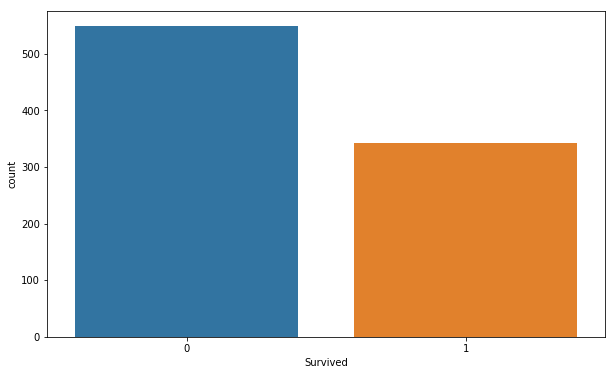

In [20]:
plt.figure(figsize=(10,6))
sns.countplot('Survived',data=dadosTreino)

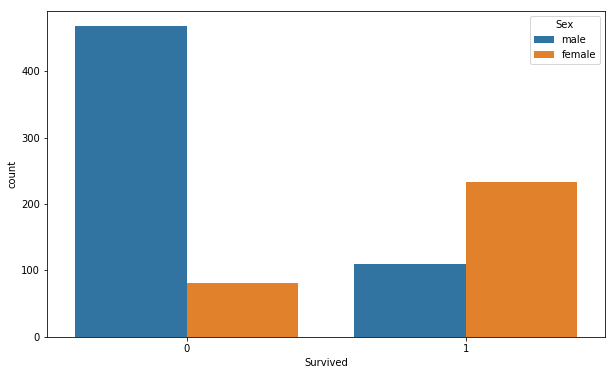

In [21]:
plt.figure(figsize=(10,6))
sns.countplot('Survived',data=dadosTreino,hue='Sex')

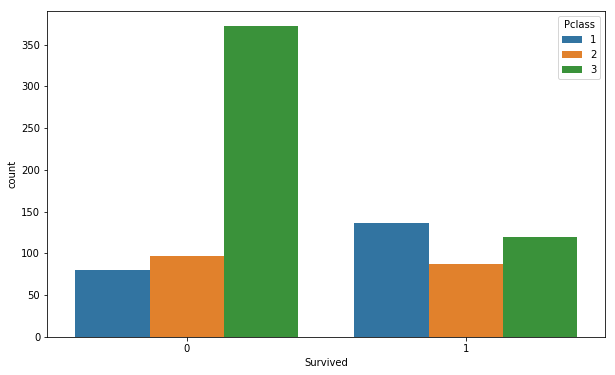

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('Survived',data = dadosTreino, hue='Pclass')

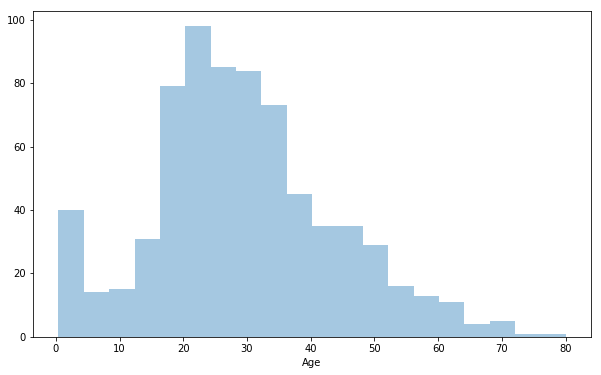

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(dadosTreino['Age'].dropna(),kde=False)

### Preparar os dados

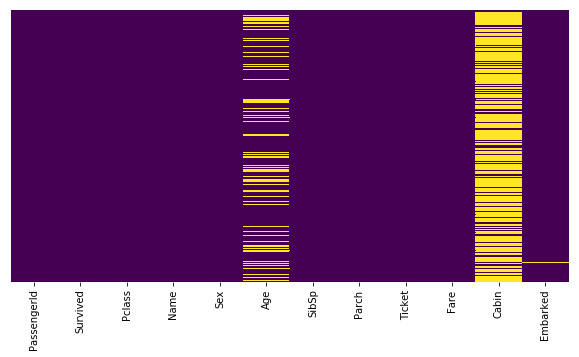

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(dadosTreino.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
dadosTeste.drop('Cabin',axis=1,inplace=True)

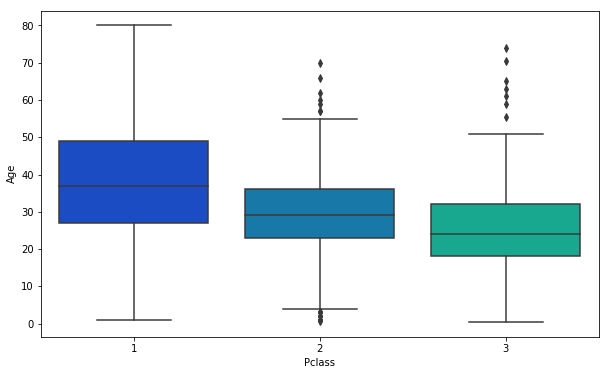

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=dadosTreino,palette='winter')

In [56]:
def InputarIdade(cols):
    Idade = cols[0]
    Pclass = cols[1]
    if pd.isnull(Idade):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Idade

In [94]:
dadosTreino['Age'] = dadosTreino[['Age','Pclass']].apply(InputarIdade,axis=1)
dadosTeste['Age'] = dadosTeste[['Age','Pclass']].apply(InputarIdade,axis=1)

In [95]:
dadosTreino.drop('Cabin',axis=1,inplace=True)
dadosTeste.drop('Cabin',axis=1,inplace=True)

In [96]:
dadosTreino.drop('Ticket',axis=1,inplace=True)
dadosTeste.drop('Ticket',axis=1,inplace=True)

In [97]:
sex = pd.get_dummies(dadosTreino['Sex'],drop_first=True)
embark = pd.get_dummies(dadosTreino['Embarked'],drop_first=True)

sex2 = pd.get_dummies(dadosTeste['Sex'],drop_first=True)
embark2 = pd.get_dummies(dadosTeste['Embarked'],drop_first=True)

In [98]:
dadosTreino.drop(['Sex','Name','Embarked'],axis=1,inplace=True)
dadosTeste.drop(['Sex','Name','Embarked'],axis=1,inplace=True)

In [99]:
dadosTreino = pd.concat([dadosTreino,sex,embark],axis=1)

dadosTeste = pd.concat([dadosTeste,sex2,embark2],axis=1)

In [109]:
dadosTeste.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


### Aplicar Método de Previsão/Classificação

In [122]:
X_train = dadosTreino.drop(['Survived','Fare'],axis=1)
y_train = dadosTreino['Survived']

X_teste = dadosTeste.drop('Fare',axis=1)

In [123]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
previsoes = logmodel.predict(X_teste)

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_train[:418],previsoes))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       255
           1       0.34      0.34      0.34       163

   micro avg       0.49      0.49      0.49       418
   macro avg       0.46      0.46      0.46       418
weighted avg       0.49      0.49      0.49       418

